### Author: Ran Meng

This jupyter notebook contains my work for certification of "ARIMA Models in Python" instructed by James Fulton, from [DataCamp](https://app.datacamp.com/learn/courses/arima-models-in-python)

In [1]:
import matplotlib.pyplot as plt
import pandas as pd, numpy as np
import joblib
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_process import arma_generate_sample
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX

## ARMA models

#### Exploration

You may make plots regularly, but in this course, it is important that you can explicitly control which axis different time series are plotted on. This will be important so you can evaluate your time series predictions later.

Here your task is to plot a dataset of monthly US candy production between 1972 and 2018.

Specifically, you are plotting the industrial production index IPG3113N. This is total amount of sugar and confectionery products produced in the USA per month, as a percentage of the January 2012 production. So 120 would be 120% of the January 2012 industrial production.

Check out how this quantity has changed over time and how it changes throughout the year

In [2]:
candy = pd.read_csv('candy_production.csv', 
            index_col='date',
            parse_dates= True)

In [3]:
candy.head()

,IPG3113N
date,
1972-01-01,85.598809
1972-02-01,71.741404
1972-03-01,65.948809
1972-04-01,64.490724
1972-05-01,64.933842


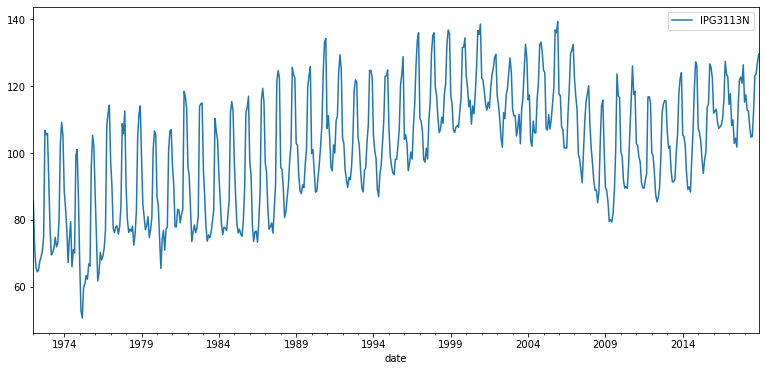

In [4]:
# Plot and show the time series on axis ax1
fig, ax1 = plt.subplots(figsize = (13,6))
candy.plot(ax=ax1)
plt.show()

#### Train-test splits

In this exercise you are going to take the candy production dataset and split it into a train and a test set. Like you understood in the video exercise, the reason to do this is so that you can test the quality of your model fit when you are done.

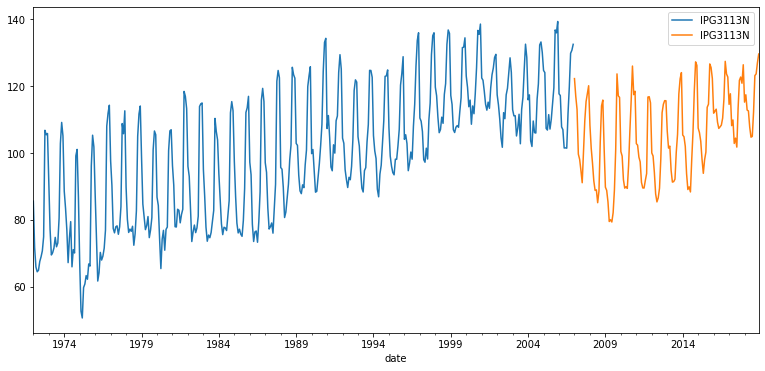

In [5]:
# Split the data into a train and test set
candy_train = candy.loc[:'2006']
candy_test = candy.loc['2007':]

# Create an axis
fig, ax = plt.subplots(figsize = (13,6))

# Plot the train and test sets on the axis ax
candy_train.plot(ax=ax)
candy_test.plot(ax=ax)
plt.show()

#### Augmented Dicky-Fuller

In this exercise you will run the augmented Dicky-Fuller test on the earthquakes time series to test for stationarity. You plotted this time series in the last exercise. It looked like it could be stationary, but earthquakes are very damaging. If you want to make predictions about them you better be sure.

Remember that if it were not stationary this would mean that the number of earthquakes per year has a trend and is changing. This would be terrible news if it is trending upwards, as it means more damage. It would also be terrible news if it were trending downwards, it might suggest the core of our planet is changing and this could have lots of knock on effects for us!

In [6]:
earthquake = pd.read_csv("earthquakes.csv")

In [7]:
earthquake.head()

,date,Year,earthquakes_per_year
0,1900-01-01,1900,13.0
1,1901-01-01,1901,14.0
2,1902-01-01,1902,8.0
3,1903-01-01,1903,10.0
4,1904-01-01,1904,16.0


In [8]:
print(earthquake.shape)

(99, 3)


In [9]:
# Run test
result = adfuller(earthquake['earthquakes_per_year'])

# Print test statistic
print(result[0])

# Print p-value
print(result[1])

# Print critical values
print(result[4]) 

# Earth shaking effort! You can reject the null hypothesis that the time series is non-stationary. 
# Therefore it is stationary. You probably could have intuited this from looking at the graph or by 
# knowing a little about geology. The time series covers only about 100 years which is a very short time 
# on a geological time scale.

-3.1831922511917816
0.020978425256003668
{'1%': -3.5003788874873405, '5%': -2.8921519665075235, '10%': -2.5830997960069446}


#### Taking the difference

In this exercise, you will to prepare a time series of the population of a city for modeling. If you could predict the growth rate of a city then it would be possible to plan and build the infrastructure that the city will need later, thus future-proofing public spending. In this case the time series is fictitious but its perfect to practice on.

You will test for stationarity by eye and use the Augmented Dicky-Fuller test, and take the difference to make the dataset stationary.

In [ ]:
# Run the ADF test on the time series
result = adfuller(city['city_population'])

# Plot the time series
fig, ax = plt.subplots()
city.plot(ax=ax)
plt.show()

# Print the test statistic and the p-value
print('ADF Statistic:', result[0]) # 5.297698878151177
print('p-value:', result[1]) # 1.0

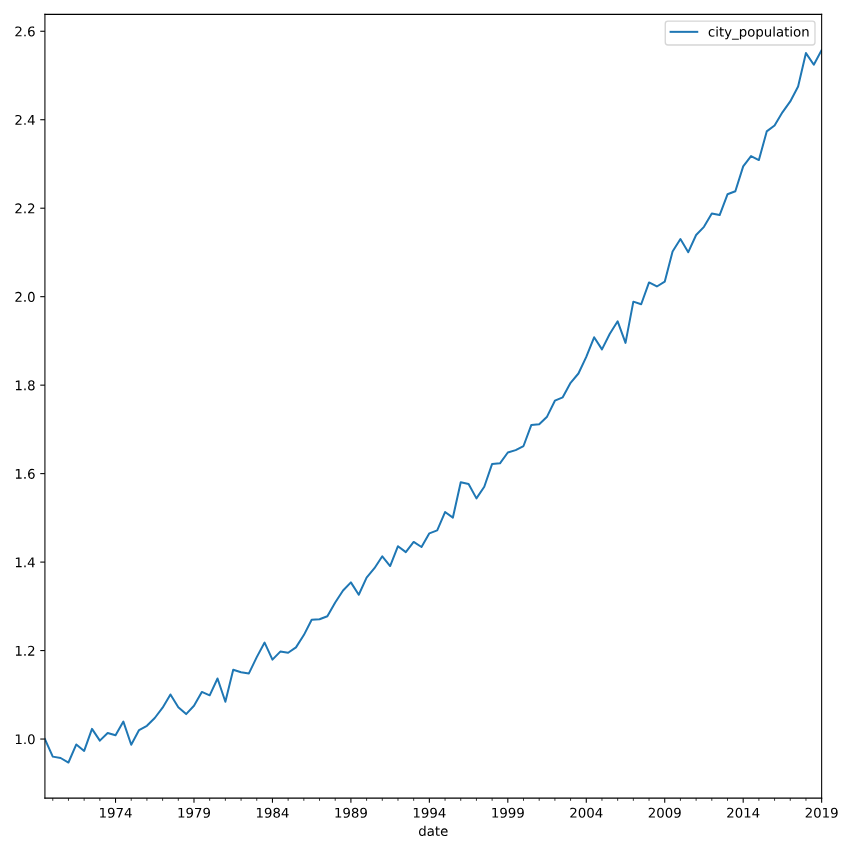

In [ ]:
# Taking first difference

# Calculate the first difference of the time series
city_stationary = city.diff().dropna()

# Run ADF test on the differenced time series
result = adfuller(city_stationary['city_population'])

# Plot the differenced time series
fig, ax = plt.subplots()
city_stationary.plot(ax=ax)
plt.show()

# Print the test statistic and the p-value
print('ADF Statistic:', result[0]) # -0.8146211646182102
print('p-value:', result[1]) # 0.8147894381484784


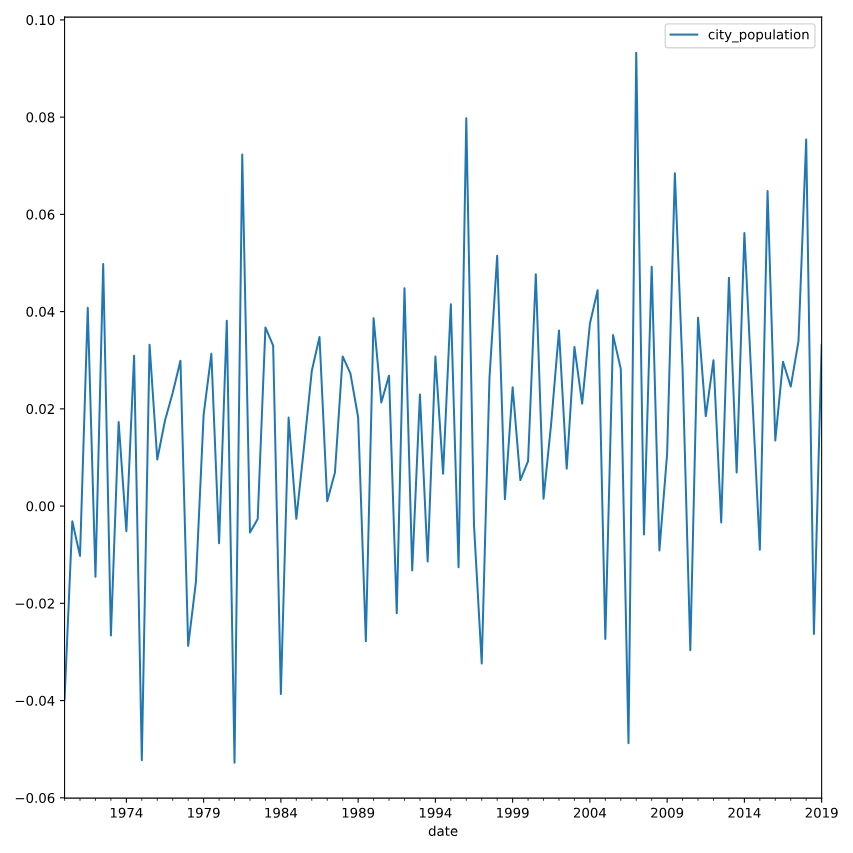

In [ ]:
# Taking second difference

# Calculate the second difference of the time series
city_stationary = city.diff().diff().dropna()

# Run ADF test on the differenced time series
result = adfuller(city_stationary['city_population'])

# Plot the differenced time series
fig, ax = plt.subplots()
city_stationary.plot(ax=ax)
plt.show()

# Print the test statistic and the p-value
print('ADF Statistic:', result[0]) # -6.433646032918734
print('p-value:', result[1]) # 1.6734498510401136e-08

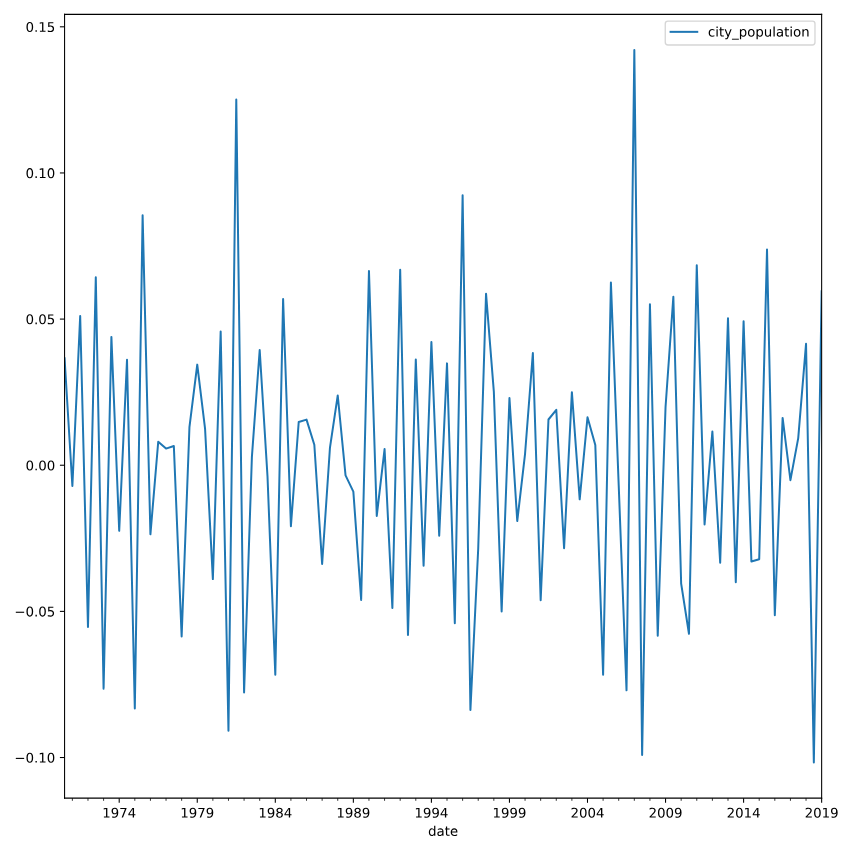

#### Other tranforms

Differencing should be the first transform you try to make a time series stationary. But sometimes it isn't the best option.

A classic way of transforming stock time series is the log-return of the series. This is calculated as follows:

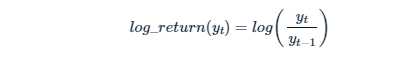

You can calculate the log-return of this DataFrame by substituting:

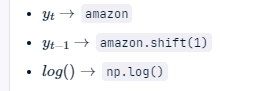

In [10]:
amazon = pd.read_csv('amazon_close.csv')

In [11]:
print(amazon.shape)
print(amazon.dtypes)

(1259, 2)
date      object
close    float64
dtype: object


In [12]:
amazon.head()

,date,close
0,2019-02-08,1588.22
1,2019-02-07,1614.37
2,2019-02-06,1640.26
3,2019-02-05,1658.81
4,2019-02-04,1633.31


In [13]:
# Calculate the first difference and drop the nans
amazon = amazon.sort_values('date').set_index('date')
amazon.head()

,close
date,
2014-02-10,360.87
2014-02-11,361.79
2014-02-12,349.25
2014-02-13,357.20
2014-02-14,357.35


In [14]:
amazon_diff = amazon.diff()
amazon_diff = amazon_diff.dropna()

# Run test and print
result_diff = adfuller(amazon_diff['close'])
print(result_diff)

(-7.201108938057426, 2.3642150138962053e-10, 23, 1234, {'1%': -3.435660336370594, '5%': -2.863885022214541, '10%': -2.568018522153254}, 10862.499714083922)


In [15]:
# Calculate log-return and drop nans
amazon_log = np.log(amazon/amazon.shift(1))
amazon_log = amazon_log.dropna()

# Run test and print
result_log = adfuller(amazon_log['close'])
print(result_log)

# Great work! Notice that both the differenced and the log-return transformed time series have a small p-value, 
# but the log transformed time series has a much more negative test statistic. 
# This means the log-return tranformation makes the data more stationary.

(-34.892719467820626, 0.0, 0, 1257, {'1%': -3.4355629707955395, '5%': -2.863842063387667, '10%': -2.567995644141416}, -6221.259222090162)


#### Model order

When fitting and working with AR, MA and ARMA models it is very important to understand the model order. You will need to pick the model order when fitting. Picking this correctly will give you a better fitting model which makes better predictions. So in this section you will practice working with model order.

In [16]:
ar_coefs = [1, 0.4, -0.1]
ma_coefs = [1, 0.2] 

In [17]:
print(ar_coefs)
print(ma_coefs)

# ARMA(2,1), lag-1 AR coefficient = -0.4 in arma_generate_sample()

[1, 0.4, -0.1]
[1, 0.2]


#### Generating ARMA data

In this exercise you will generate 100 days worth of AR/MA/ARMA data. Remember that in the real world applications, this data could be changes in Google stock prices, the energy requirements of New York City, or the number of cases of flu.

You can use the arma_generate_sample() function available in your workspace to generate time series using different AR and MA coefficients.

Remember for any model ARMA(p,q):

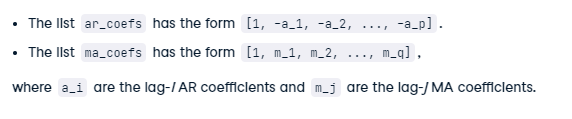

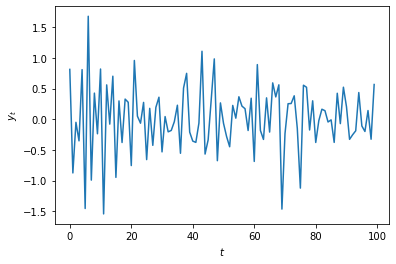

In [18]:
np.random.seed(1)

# Set coefficients
ar_coefs = [1]
ma_coefs = [1, -0.7]

# Generate data
y = arma_generate_sample(ar_coefs, ma_coefs, nsample=100, scale=0.5)

plt.plot(y)
plt.rcParams["figure.figsize"] = (18,10)
plt.ylabel(r'$y_t$')
plt.xlabel(r'$t$')
plt.show()

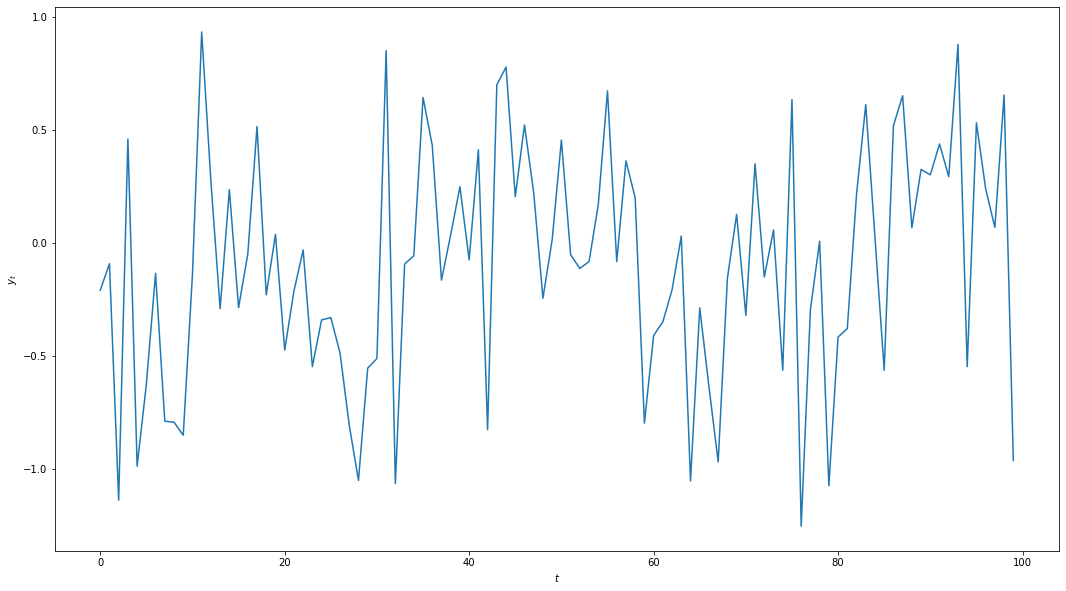

In [19]:
# Import data generation function and set random seed
np.random.seed(2)

# Set coefficients
ar_coefs = [1, -0.3, -0.2]
ma_coefs = [1]

# Generate data
y = arma_generate_sample(ar_coefs, ma_coefs, nsample=100, scale=0.5)

plt.plot(y)
plt.rcParams["figure.figsize"] = (18,10)
plt.ylabel(r'$y_t$')
plt.xlabel(r'$t$')
plt.show()

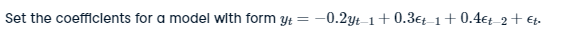

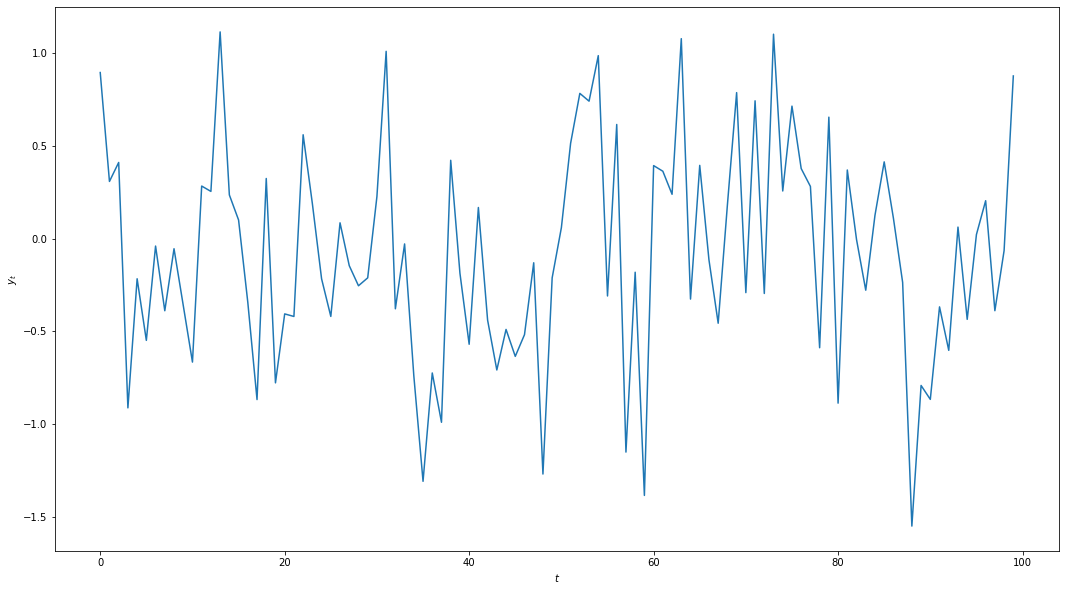

In [20]:
np.random.seed(3)

# Set coefficients
ar_coefs = [1, 0.2]
ma_coefs = [1, 0.3, 0.4]

# Generate data
y = arma_generate_sample(ar_coefs, ma_coefs, nsample=100, scale=0.5)

plt.plot(y)
plt.rcParams["figure.figsize"] = (18,10)
plt.ylabel(r'$y_t$')
plt.xlabel(r'$t$')
plt.show()

#### Fitting Prelude

Great, you understand model order! Understanding the order is important when it comes to fitting models. You will always need to select the order of model you fit to your data, no matter what that data is.

In this exercise you will do some basic fitting. Fitting models is the next key step towards making predictions. We'll go into this more in the next chapter but let's get a head start.

Some example ARMA(1,1) data have been created and are available in your environment as y. This data could represent the amount of traffic congestion. You could use forecasts of this to suggest the efficient routes for drivers.

In [22]:
# Instantiate the model
model = ARIMA(y, order=(1,0,1))

# Fit the model
results = model.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  500
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -364.836
Date:                Tue, 12 Sep 2023   AIC                            737.672
Time:                        17:49:07   BIC                            754.530
Sample:                             0   HQIC                           744.287
                                - 500                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1102      0.084      1.311      0.190      -0.055       0.275
ar.L1          0.5367      0.041     13.068      0.000       0.456       0.617
ma.L1          0.7382      0.034     21.823      0.0

## Fitting the Future

#### Fitting AR and MA models

In this exercise you will fit an AR and an MA model to some data. The data here has been generated using the arma_generate_sample() function we used before.

You know the real AR and MA parameters used to create this data so it is a really good way to gain some confidence with ARMA models and know you are doing it right. In the next exercise you'll move onto some real world data with confidence.

There is a pandas DataFrame available in your environment called sample. It has two columns of different time series data.

In [ ]:
# Instantiate the model
model = ARIMA(sample['timeseries_1'], order=[2,0,0])

# Fit the model
results = model.fit()

# Print summary
print(results.summary()) # ar_coefs = [1, -0.9, 0.3]

#                                SARIMAX Results                                
# ==============================================================================
# Dep. Variable:           timeseries_1   No. Observations:                 1000
# Model:                 ARIMA(2, 0, 0)   Log Likelihood                 148.855
# Date:                Mon, 11 Sep 2023   AIC                           -289.709
# Time:                        20:41:11   BIC                           -270.078
# Sample:                             0   HQIC                          -282.248
#                                - 1000                                         
# Covariance Type:                  opg                                         
# ==============================================================================
#                  coef    std err          z      P>|z|      [0.025      0.975]
# ------------------------------------------------------------------------------
# const         -0.0027      0.018     -0.151      0.880      -0.037       0.032
# ar.L1          0.8980      0.031     28.660      0.000       0.837       0.959
# ar.L2         -0.2704      0.032     -8.561      0.000      -0.332      -0.209
# sigma2         0.0434      0.002     21.502      0.000       0.039       0.047
# ===================================================================================
# Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.04
# Prob(Q):                              1.00   Prob(JB):                         0.59
# Heteroskedasticity (H):               0.95   Skew:                             0.03
# Prob(H) (two-sided):                  0.63   Kurtosis:                         2.85
# ===================================================================================


In [ ]:
# Instantiate the model
model = ARIMA(sample['timeseries_2'], order=[0,0,3])

# Fit the model
results = model.fit()

# Print summary
print(results.summary())  # ma_coefs = [1, 0.2, 0.6, -0.1]

#                                SARIMAX Results                                
# ==============================================================================
# Dep. Variable:           timeseries_2   No. Observations:                 1000
# Model:                 ARIMA(0, 0, 3)   Log Likelihood                 149.007
# Date:                Mon, 11 Sep 2023   AIC                           -288.014
# Time:                        20:47:29   BIC                           -263.475
# Sample:                             0   HQIC                          -278.687
#                                - 1000                                         
# Covariance Type:                  opg                                         
# ==============================================================================
#                  coef    std err          z      P>|z|      [0.025      0.975]
# ------------------------------------------------------------------------------
# const         -0.0018      0.012     -0.158      0.875      -0.025       0.021
# ma.L1          0.1995      0.032      6.183      0.000       0.136       0.263
# ma.L2          0.6359      0.025     25.435      0.000       0.587       0.685
# ma.L3         -0.0833      0.031     -2.699      0.007      -0.144      -0.023
# sigma2         0.0434      0.002     21.441      0.000       0.039       0.047
# ===================================================================================
# Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.02
# Prob(Q):                              0.99   Prob(JB):                         0.60
# Heteroskedasticity (H):               0.94   Skew:                             0.00
# Prob(H) (two-sided):                  0.56   Kurtosis:                         2.84
# ===================================================================================

#### Fitting an ARMA model

In this exercise you will fit an ARMA model to the earthquakes dataset. You saw before that the earthquakes dataset is stationary so you don't need to transform it at all. It comes ready for modeling straight out the ground.

In [23]:
# Instantiate the model
model = ARIMA(earthquake['earthquakes_per_year'], order = (3,0,1))

# Fit the model
results = model.fit()

# Print model fit summary
print(results.summary())

                                SARIMAX Results                                 
Dep. Variable:     earthquakes_per_year   No. Observations:                   99
Model:                   ARIMA(3, 0, 1)   Log Likelihood                -315.673
Date:                  Tue, 12 Sep 2023   AIC                            643.345
Time:                          17:49:19   BIC                            658.916
Sample:                               0   HQIC                           649.645
                                   - 99                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.6453      2.233      8.798      0.000      15.269      24.022
ar.L1          0.5795      0.645      0.899      0.369      -0.684       1.843
ar.L2          0.0251      0.308    

#### Fitting an ARMAX model

In this exercise you will fit an ARMAX model to a time series which represents the wait times at an accident and emergency room for urgent medical care.

The variable you would like to model is the wait times to be seen by a medical professional wait_times_hrs. This may be related to an exogenous variable that you measured nurse_count which is the number of nurses on shift at any given time. These can be seen below.

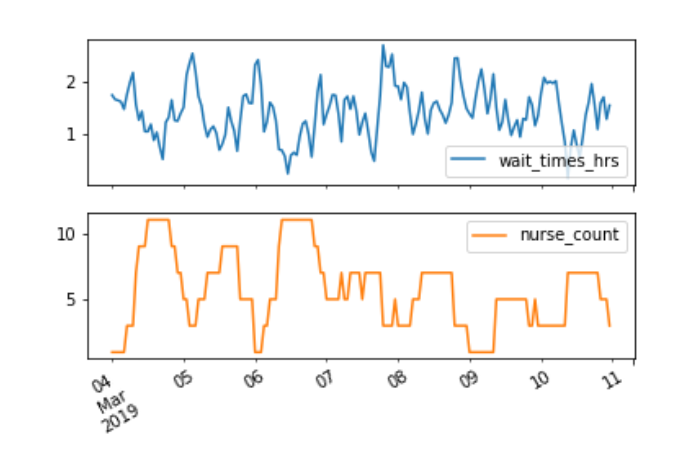

In [ ]:
# Instantiate the model
model = ARIMA(hospital['wait_times_hrs'], order = (2,0,1), exog = hospital['nurse_count'])

# Fit the model
results = model.fit()

# Print model fit summary
print(results.summary())

#                                   SARIMAX Results                                
#     ==============================================================================
#     Dep. Variable:         wait_times_hrs   No. Observations:                  168
#     Model:                 ARIMA(2, 0, 1)   Log Likelihood                 -11.834
#     Date:                Mon, 11 Sep 2023   AIC                             35.668
#     Time:                        20:52:49   BIC                             54.411
#     Sample:                    03-04-2019   HQIC                            43.275
#                              - 03-10-2019                                         
#     Covariance Type:                  opg                                         
#     ===============================================================================
#                       coef    std err          z      P>|z|      [0.025      0.975]
#     -------------------------------------------------------------------------------
#     const           2.1001      0.086     24.375      0.000       1.931       2.269
#     nurse_count    -0.1171      0.012     -9.562      0.000      -0.141      -0.093
#     ar.L1           0.5693      0.169      3.365      0.001       0.238       0.901
#     ar.L2          -0.1612      0.140     -1.149      0.250      -0.436       0.114
#     ma.L1           0.3728      0.169      2.211      0.027       0.042       0.703
#     sigma2          0.0670      0.009      7.601      0.000       0.050       0.084
#     ===================================================================================
#     Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 3.11
#     Prob(Q):                              0.90   Prob(JB):                         0.21
#     Heteroskedasticity (H):               0.94   Skew:                             0.18
#     Prob(H) (two-sided):                  0.81   Kurtosis:                         2.44
#     ===================================================================================

#### Generating one-step-ahead predictions

It is very hard to forecast stock prices. Classic economics actually tells us that this should be impossible because of market clearing.

Your task in this exercise is to attempt the impossible and predict the Amazon stock price anyway.

In this exercise you will generate one-step-ahead predictions for the stock price as well as the uncertainty of these predictions.

In [24]:
amazon.head()

,close
date,
2014-02-10,360.87
2014-02-11,361.79
2014-02-12,349.25
2014-02-13,357.20
2014-02-14,357.35


In [25]:
model = ARIMA(amazon['close'], order = (3,1,3))

results = model.fit()

print(results.summary())

D:\Anaconda\envs\arima\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Anaconda\envs\arima\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Anaconda\envs\arima\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Anaconda\envs\arima\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters

                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                 1259
Model:                 ARIMA(3, 1, 3)   Log Likelihood               -5529.554
Date:                Tue, 12 Sep 2023   AIC                          11073.109
Time:                        17:49:29   BIC                          11109.070
Sample:                             0   HQIC                         11086.623
                               - 1259                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0580      0.041     -1.420      0.156      -0.138       0.022
ar.L2         -0.1802      0.035     -5.108      0.000      -0.249      -0.111
ar.L3         -0.9033      0.041    -22.058      0.0

D:\Anaconda\envs\arima\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [26]:
# Generate predictions
one_step_forecast = results.get_prediction(start=-30)

# Extract prediction mean
mean_forecast = one_step_forecast.predicted_mean

# Get confidence intervals of  predictions
confidence_intervals = one_step_forecast.conf_int()

# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower close']
upper_limits = confidence_intervals.loc[:,'upper close']

# Print best estimate  predictions
print(mean_forecast.values)

[1479.64071991 1465.83257849 1471.60851397 1493.64710226 1536.48674511
 1505.07034735 1586.21431416 1627.8991144  1649.18071333 1649.38280813
 1659.34197787 1648.24063262 1625.56515495 1672.14266985 1673.36482278
 1686.70764204 1699.94751937 1640.89609881 1647.8225273  1649.4799821
 1661.6658435  1630.95727126 1601.26534844 1682.20232281 1720.39440696
 1614.13268424 1627.84143679 1659.21340816 1650.44410837 1618.93238328]


#### Plotting one-step-ahead predictions

Now that you have your predictions on the Amazon stock, you should plot these predictions to see how you've done.

You made predictions over the latest 30 days of data available, always forecasting just one day ahead. By evaluating these predictions you can judge how the model performs in making predictions for just the next day, where you don't know the answer.

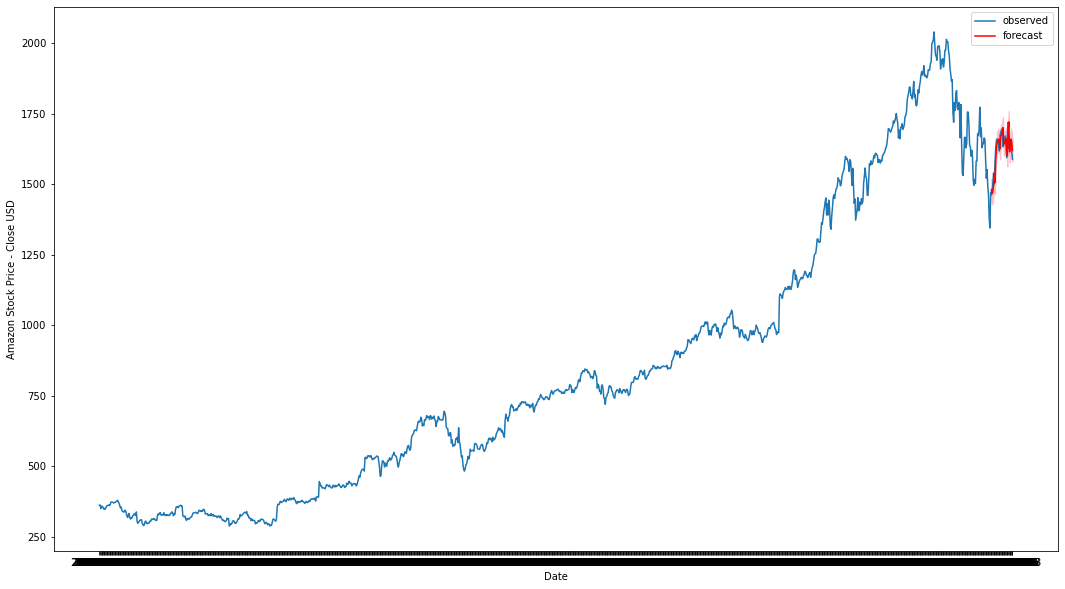

In [27]:
# plot the amazon data
plt.plot(amazon.index, amazon, label='observed')

# plot your mean predictions
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(lower_limits.index, lower_limits,
		 upper_limits, color='pink')

# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('Amazon Stock Price - Close USD')
plt.legend()
plt.show()

#### Generating dynamic forecasts

Now lets move a little further into the future, to dynamic predictions. What if you wanted to predict the Amazon stock price, not just for tomorrow, but for next week or next month? This is where dynamical predictions come in.

Remember that in the video you learned how it is more difficult to make precise long-term forecasts because the shock terms add up. The further into the future the predictions go, the more uncertain. This is especially true with stock data and so you will likely find that your predictions in this exercise are not as precise as those in the last exercise.

In [28]:
# Generate predictions
dynamic_forecast = results.get_prediction(start=-30, dynamic=True)

# Extract prediction mean
mean_forecast = dynamic_forecast.predicted_mean

# Get confidence intervals of predictions
confidence_intervals = dynamic_forecast.conf_int()

# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower close']
upper_limits = confidence_intervals.loc[:,'upper close']

# Print best estimate predictions
print(mean_forecast)

date
2018-12-27    1479.640720
2018-12-28    1484.170024
2018-12-31    1476.690924
2019-01-02    1468.413112
2019-01-03    1466.149629
2019-01-04    1474.528283
2019-01-07    1481.927494
2019-01-08    1482.033152
2019-01-09    1473.125399
2019-01-10    1466.939335
2019-01-11    1468.807797
2019-01-14    1477.860388
2019-01-15    1482.586503
2019-01-16    1478.993415
2019-01-17    1470.173086
2019-01-18    1467.063026
2019-01-22    1472.078371
2019-01-23    1480.315214
2019-01-24    1481.743065
2019-01-25    1475.645715
2019-01-28    1468.301802
2019-01-29    1468.536658
2019-01-30    1475.354039
2019-01-31    1481.550010
2019-02-01    1479.750080
2019-02-04    1472.579924
2019-02-05    1467.723351
2019-02-06    1470.922885
2019-02-07    1478.089176
2019-02-08    1481.483909
Name: predicted_mean, dtype: float64


#### Plotting dynamic forecasts

Time to plot your predictions. Remember that making dynamic predictions, means that your model makes predictions with no corrections, unlike the one-step-ahead predictions. This is kind of like making a forecast now for the next 30 days, and then waiting to see what happens before comparing how good your predictions were.

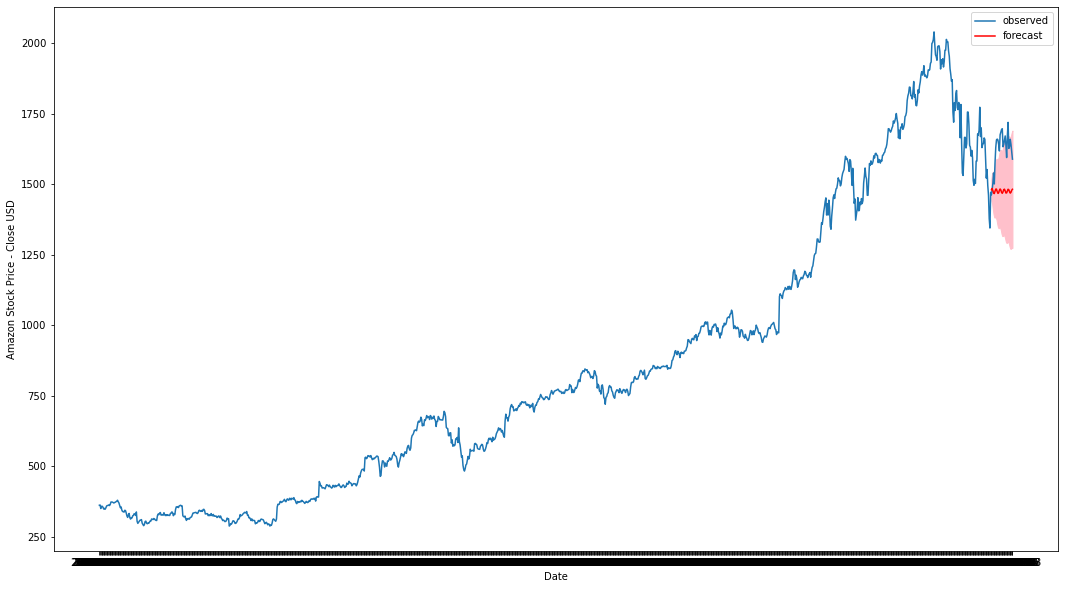

In [29]:
# plot the amazon data
plt.plot(amazon.index, amazon, label='observed')

# plot your mean forecast
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(lower_limits.index, lower_limits, 
         upper_limits, color='pink')

# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('Amazon Stock Price - Close USD')
plt.legend()
plt.show()

#### Differencing and fitting ARMA

In this exercise you will fit an ARMA model to the Amazon stocks dataset. As you saw before, this is a non-stationary dataset. You will use differencing to make it stationary so that you can fit an ARMA model.

In the next section you'll make a forecast of the differences and use this to forecast the actual values.

The Amazon stock time series is available in your environment as amazon. The ARIMA model class is also available in your environment.

In [30]:
# Take the first difference of the data
amazon_diff = amazon.diff().dropna()

# Create ARMA(2,2) model
arma = ARIMA(amazon_diff, order = (2,0,2))

# Fit model
arma_results = arma.fit()

# Print fit summary
print(arma_results.summary())

D:\Anaconda\envs\arima\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Anaconda\envs\arima\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Anaconda\envs\arima\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                 1258
Model:                 ARIMA(2, 0, 2)   Log Likelihood               -5532.371
Date:                Tue, 12 Sep 2023   AIC                          11076.743
Time:                        17:50:09   BIC                          11107.566
Sample:                             0   HQIC                         11088.327
                               - 1258                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9862      0.494      1.995      0.046       0.017       1.955
ar.L1         -0.1537      0.073     -2.119      0.034      -0.296      -0.012
ar.L2          0.7947      0.072     11.108      0.0

#### Unrolling ARMA forecast

Now you will use the model that you trained in the previous exercise arma in order to forecast the absolute value of the Amazon stocks dataset. Remember that sometimes predicting the difference could be enough; will the stocks go up, or down; but sometimes the absolute value is key.

The results object from the model you trained in the last exercise is available in your environment as arma_results. The np.cumsum() function and the original DataFrame amazon are also available.

In [31]:
# Make arma forecast of next 10 differences
arma_diff_forecast = arma_results.get_forecast(steps=10).predicted_mean

# Integrate the difference forecast
arma_int_forecast = np.cumsum(arma_diff_forecast)

# Make absolute value forecast
arma_value_forecast = arma_int_forecast + amazon.iloc[-1,0]

# Print forecast
print(arma_value_forecast)

1258    1592.062806
1259    1594.206094
1260    1597.284546
1261    1598.868615
1262    1601.425614
1263    1602.645442
1264    1604.844045
1265    1605.829515
1266    1607.779332
1267    1608.616809
Name: predicted_mean, dtype: float64


D:\Anaconda\envs\arima\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


#### Fitting an ARIMA model

In this exercise you'll learn how to be lazy in time series modeling. Instead of taking the difference, modeling the difference and then integrating, you're just going to lets statsmodels do the hard work for you.

You'll repeat the same exercise that you did before, of forecasting the absolute values of the Amazon stocks dataset, but this time with an ARIMA model.

A subset of the stocks dataset is available in your environment as amazon and so is the ARIMA model class.

In [32]:
# Create ARIMA(2,1,2) model
arima = ARIMA(amazon, order = (2,1,2))

# Fit ARIMA model
arima_results = arima.fit()

# Make ARIMA forecast of next 10 values
arima_value_forecast = arima_results.get_forecast(steps=10).predicted_mean

# Print forecast
print(arima_value_forecast)

D:\Anaconda\envs\arima\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Anaconda\envs\arima\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Anaconda\envs\arima\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


1259    1594.843148
1260    1601.971414
1261    1603.143711
1262    1597.445322
1263    1590.199622
1264    1587.999455
1265    1592.711709
1266    1599.904114
1267    1603.009201
1268    1599.317967
Name: predicted_mean, dtype: float64


D:\Anaconda\envs\arima\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Anaconda\envs\arima\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


## The Best of the Best Models

#### AR or MA

In this exercise you will use the ACF and PACF to decide whether some data is best suited to an MA model or an AR model. Remember that selecting the right model order is of great importance to our predictions.

Remember that for different types of models we expect the following behavior in the ACF and PACF:

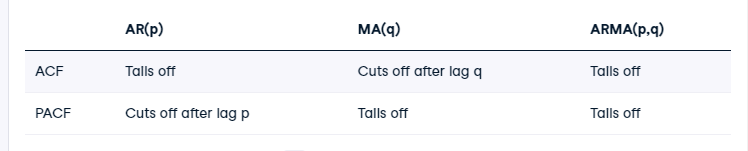

In [33]:
earthquake

,date,Year,earthquakes_per_year
0,1900-01-01,1900,13.0
1,1901-01-01,1901,14.0
2,1902-01-01,1902,8.0
3,1903-01-01,1903,10.0
4,1904-01-01,1904,16.0
...,...,...,...
94,1994-01-01,1994,15.0
95,1995-01-01,1995,25.0
96,1996-01-01,1996,22.0
97,1997-01-01,1997,20.0


In [34]:
earthquake_df = earthquake.drop(['Year'], axis = 1).set_index('date')
earthquake_df.head()

,earthquakes_per_year
date,
1900-01-01,13.0
1901-01-01,14.0
1902-01-01,8.0
1903-01-01,10.0
1904-01-01,16.0


D:\Anaconda\envs\arima\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


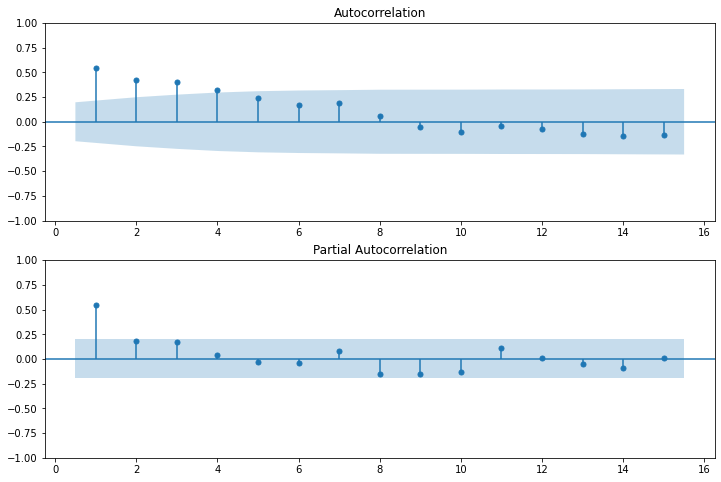

In [35]:
# Create figure
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))

# Plot ACF and PACF
plot_acf(earthquake_df, lags=15, zero=False, ax=ax1)
plot_pacf(earthquake_df, lags=15, zero=False, ax=ax2)

# Show plot
plt.show() # AR(1) model!

In [36]:
# Instantiate model
model = ARIMA(earthquake_df, order = (1,0,0))

# Train model
results = model.fit()

D:\Anaconda\envs\arima\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
D:\Anaconda\envs\arima\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
D:\Anaconda\envs\arima\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


#### Searching over model order

In this exercise you are faced with a dataset which appears to be an ARMA model. You can see the ACF and PACF in the plot below. In order to choose the best order for this model you are going to have to do a search over lots of potential model orders to find the best set.

In [ ]:
# Create empty list to store search results
order_aic_bic=[]

# Loop over p values from 0-2
for p in range(3):
  # Loop over q values from 0-2
    for q in range(3):
      	# create and fit ARMA(p,q) model
        model = ARIMA(df, order=(p,0,q))
        results = model.fit()
        
        # Append order and results tuple
        order_aic_bic.append((p,q,results.aic,results.bic))

In [ ]:
# Construct DataFrame from order_aic_bic
order_df = pd.DataFrame(order_aic_bic, 
                        columns=['p', 'q', 'AIC', 'BIC'])

# Print order_df in order of increasing AIC
print(order_df.sort_values('AIC'))

#   p  q       AIC       BIC
# 7  2  1  1414.249  1431.107
# 8  2  2  1416.085  1437.158
# 5  1  2  1417.030  1433.888
# 6  2  0  1419.109  1431.753
# 2  0  2  1425.057  1437.701
# 4  1  1  1428.052  1440.696
# 1  0  1  1429.989  1438.418
# 3  1  0  1497.308  1505.737
# 0  0  0  1615.494  1619.708

In [ ]:
# Print order_df in order of increasing BIC
print(order_df.sort_values('BIC'))

#  p  q       AIC       BIC
# 7  2  1  1414.249  1431.107
# 6  2  0  1419.109  1431.753
# 5  1  2  1417.030  1433.888
# 8  2  2  1416.085  1437.158
# 2  0  2  1425.057  1437.701
# 1  0  1  1429.989  1438.418
# 4  1  1  1428.052  1440.696
# 3  1  0  1497.308  1505.737
# 0  0  0  1615.494  1619.708

#### AIC and BIC vs ACF and PACF

In this exercise you will apply an AIC-BIC order search for the earthquakes time series. In the last lesson you decided that this dataset looked like an AR(1) process. You will do a grid search over parameters to see if you get the same results. The ACF and PACF plots for this dataset are shown below.

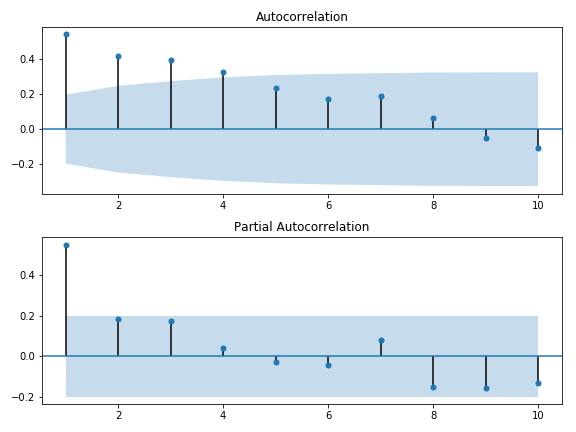

In [37]:
# Loop over p values from 0-2
for p in range(3):
    # Loop over q values from 0-2
    for q in range(3):
      
        try:
            # create and fit ARMA(p,q) model
            model = ARIMA(earthquake_df, order = (p,0,q))
            results = model.fit()
            
            # Print order and results
            print(p, q, results.aic, results.bic)
            
        except:
            print(p, q, None, None)     
            
# Super! If you look at your printed results you will see that the AIC and BIC both actually favor an ARMA(1,1) model. 
# This isn not what you predicted from the ACF and PACF but notice that the lag 2-3 PACF values are very close to significant, 
# so the ACF/PACF are close to those of an ARMA(p,q) model.

D:\Anaconda\envs\arima\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
D:\Anaconda\envs\arima\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
D:\Anaconda\envs\arima\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
D:\Anaconda\envs\arima\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
D:\Anaconda\envs\arima\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will b

0 0 676.5443594984672 681.7345991987364
0 1 654.8468586200239 662.6322181704277
0 2 651.7332270518993 662.1137064524377
1 0 643.9676770992031 651.7530366496069
1 1 640.4562835911966 650.8367629917349


D:\Anaconda\envs\arima\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
D:\Anaconda\envs\arima\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
D:\Anaconda\envs\arima\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
D:\Anaconda\envs\arima\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
D:\Anaconda\envs\arima\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will b

1 2 642.3808673565691 655.356466607242
2 0 642.7338539385182 653.1143333390565
2 1 647.4406637030957 660.4162629537686
2 2 642.4685896288087 658.0393087296162


D:\Anaconda\envs\arima\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Anaconda\envs\arima\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
D:\Anaconda\envs\arima\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
D:\Anaconda\envs\arima\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


#### Mean absolute error

Obviously, before you use the model to predict, you want to know how accurate your predictions are. The mean absolute error (MAE) is a good statistic for this. It is the mean difference between your predictions and the true values.

In this exercise you will calculate the MAE for an ARMA(1,1) model fit to the earthquakes time series

4.568988295204253


D:\Anaconda\envs\arima\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
D:\Anaconda\envs\arima\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
D:\Anaconda\envs\arima\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


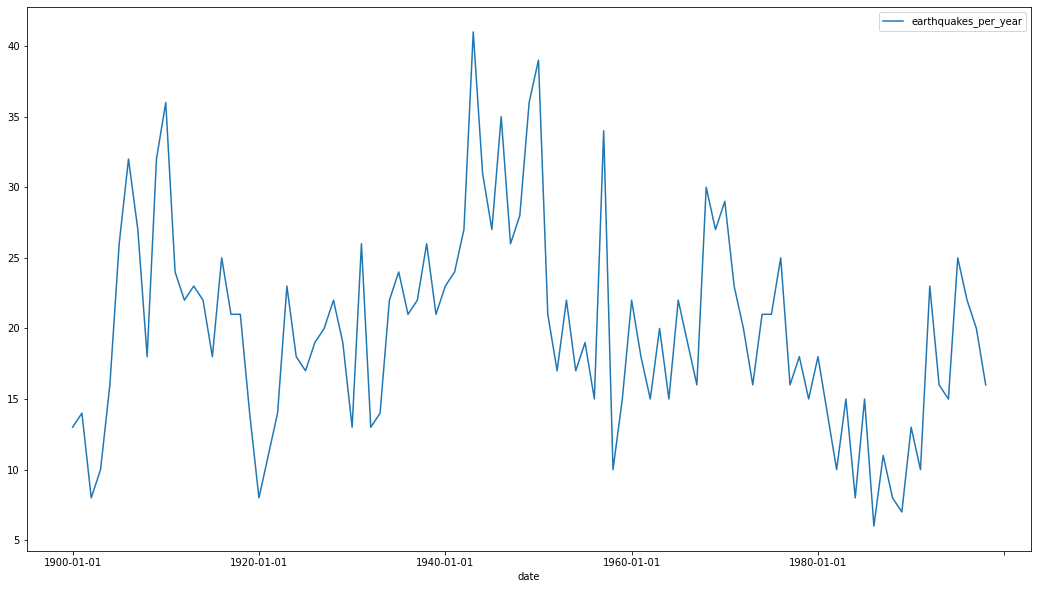

In [38]:
# Fit model
model = ARIMA(earthquake_df, order=(1,0,1))
results = model.fit()

# Calculate the mean absolute error from residuals
mae = np.mean(np.abs(results.resid))

# Print mean absolute error
print(mae)

# Make plot of time series for comparison
earthquake_df.plot()
plt.show()

# Great! Your mean error is about 4-5 earthquakes per year. 
# You have plotted the time series so that you can see how the MAE compares to the spread of the time series. 
# Considering that there are about 20 earthquakes per year that is not too bad.

#### Diagnostic summary statistics

It is important to know when you need to go back to the drawing board in model design. In this exercise you will use the residual test statistics in the results summary to decide whether a model is a good fit to a time series.

Here is a reminder of the tests in the model summary:

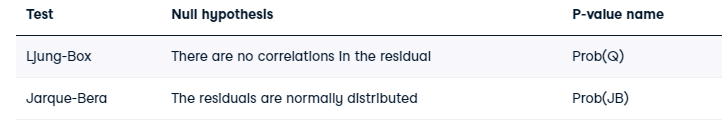

In [ ]:
# Create and fit model
model1 = ARIMA(df, order=(3,0,1))
results1 = model1.fit()

# Print summary
print(results1.summary()) # Residuals are not correlated and are normally distributed

#                               SARIMAX Results                                
# ==============================================================================
# Dep. Variable:                      y   No. Observations:                  400
# Model:                 ARIMA(3, 0, 1)   Log Likelihood                -555.394
# Date:                Tue, 12 Sep 2023   AIC                           1122.787
# Time:                        00:02:43   BIC                           1146.736
# Sample:                    01-01-2013   HQIC                          1132.272
#                          - 02-04-2014                                         
# Covariance Type:                  opg                                         
# ==============================================================================
#                  coef    std err          z      P>|z|      [0.025      0.975]
# ------------------------------------------------------------------------------
# const          0.0314      0.030      1.060      0.289      -0.027       0.090
# ar.L1          0.0163      0.109      0.150      0.881      -0.197       0.230
# ar.L2          0.2159      0.052      4.179      0.000       0.115       0.317
# ar.L3         -0.4551      0.050     -9.050      0.000      -0.554      -0.357
# ma.L1         -0.2650      0.114     -2.326      0.020      -0.488      -0.042
# sigma2         0.9388      0.065     14.460      0.000       0.812       1.066
# ===================================================================================
# Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.75
# Prob(Q):                              0.97   Prob(JB):                         0.69
# Heteroskedasticity (H):               1.22   Skew:                            -0.07
# Prob(H) (two-sided):                  0.26   Kurtosis:                         3.15
# ===================================================================================

#### Plot diagnostics

It is important to know when you need to go back to the drawing board in model design. In this exercise you will use 4 common plots to decide whether a model is a good fit to some data.

Here is a reminder of what you would like to see in each of the plots for a model that fits well:

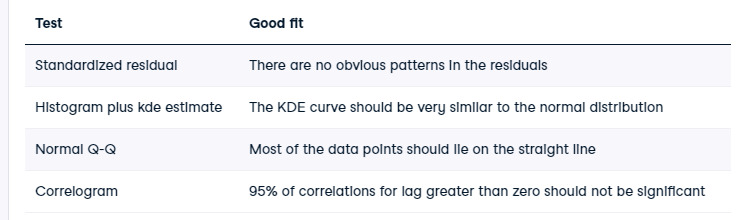

#### Identification

In the following exercises you will apply to the Box-Jenkins methodology to go from an unknown dataset to a model which is ready to make forecasts.

You will be using a new time series. This is the personal savings as % of disposable income 1955-1979 in the US.

The first step of the Box-Jenkins methodology is Identification. In this exercise you will use the tools at your disposal to test whether this new time series is stationary.

In [ ]:
# Plot time series
savings.plot()
plt.show()

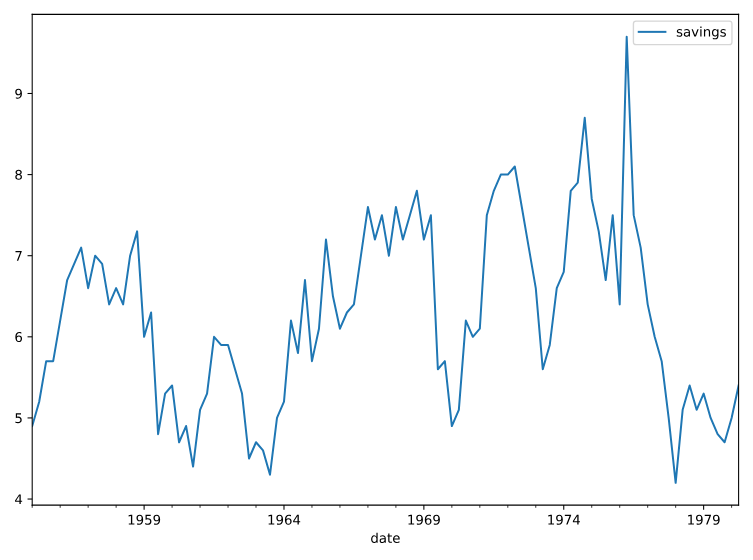

In [ ]:
# Run Dicky-Fuller test
result = adfuller(savings['savings'])

# Print test statistic
print(result[0]) # -3.185899096242141

# Print p-value
print(result[1])# 0.020815541644114092

# Great! The Dicky-Fuller test says that the series is stationary. You can confirm this when you look at the plot. 
# There is one fairly high value is 1976 which might be anomalous, but you will leave that for now.

#### Identification II

You learned that the savings time series is stationary without differencing. Now that you have this information you can try and identify what order of model will be the best fit.

The plot_acf() and the plot_pacf() functions have been imported and the time series has been loaded into the DataFrame savings.

In [ ]:
# Create figure
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))
 
# Plot the ACF of savings on ax1
plot_acf(savings, lags = 10, zero = False, ax = ax1)

# Plot the PACF of savings on ax2
plot_pacf(savings, lags = 10, zero = False, ax = ax2)

plt.show()

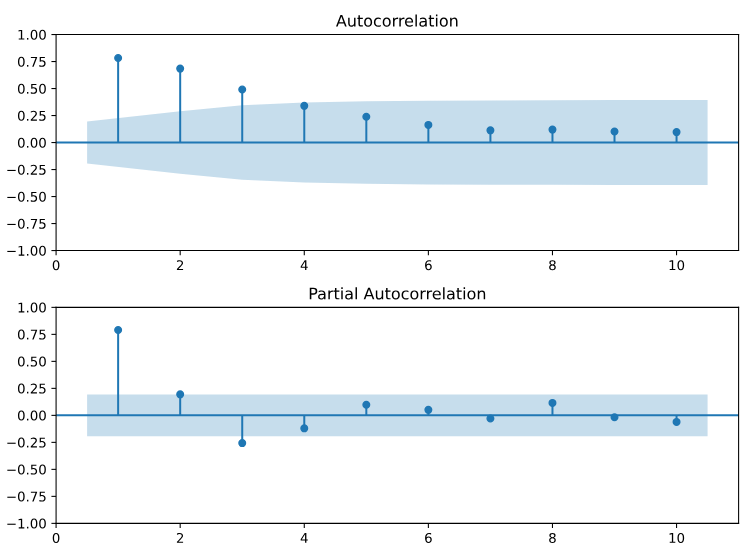

The ACF and the PACF are a little inconclusive for this ones. The ACF tails off nicely but the PACF might be tailing off or it might be dropping off. So it could be an ARMA(p,q) model or a AR(p) model.

#### Estimation

In the last exercise, the ACF and PACF were a little inconclusive. The results suggest your data could be an ARMA(p,q) model or could be an imperfect AR(3) model. In this exercise you will search over models over some model orders to find the best one according to AIC.

In [ ]:
# Loop over p values from 0-3
for p in range(4):
  
  # Loop over q values from 0-3
    for q in range(4):
        try:
            # Create and fit ARMA(p,q) model
            model = ARIMA(savings, order=(p, 0, q))
            results = model.fit()

            # Print p, q, AIC, BIC
            print(p, q, results.aic, results.bic)
        
        except:
            print(p, q, None, None)
            
#     0 0 313.6028657381061 318.85281136467466
#     0 1 267.06970980844704 274.94462824829986
#     0 2 232.16782677363798 242.66771802677508
#     0 3 217.59720509753365 230.72206916395498
#     1 0 216.203479563773 224.0783980036258
#     1 1 215.7003889529165 226.2002802060536
#     1 2 207.6529838444748 220.77784791089613 (Best one)
#     1 3 209.57498315813876 225.3248200378444
#     2 0 213.97232199692382 224.47221325006092
#     2 1 213.4303586787578 226.55522274517915
#     2 2 209.57903144324032 225.32886832294594
#     2 3 211.57498195187546 229.94979164486534
#     3 0 209.54492936717307 222.6697934335944
#     3 1 210.82147284903212 226.57130972873773
#     3 2 211.45759548497693 229.83240517796682
#     3 3 213.35650857579535 234.3562910820695

#### Diagnostics

You have arrived at the model diagnostic stage. So far you have found that the initial time series was stationary, but may have one outlying point. You identified promising model orders using the ACF and PACF and confirmed these insights by training a lot of models and using the AIC and BIC.

You found that the ARMA(1,2) model was the best fit to our data and now you want to check over the predictions it makes before you would move it into production.

In [ ]:
# Create and fit model
model = ARIMA(savings, order = (1,0,2))
results = model.fit()

# Create the 4 diagostics plots
results.plot_diagnostics()
plt.show()


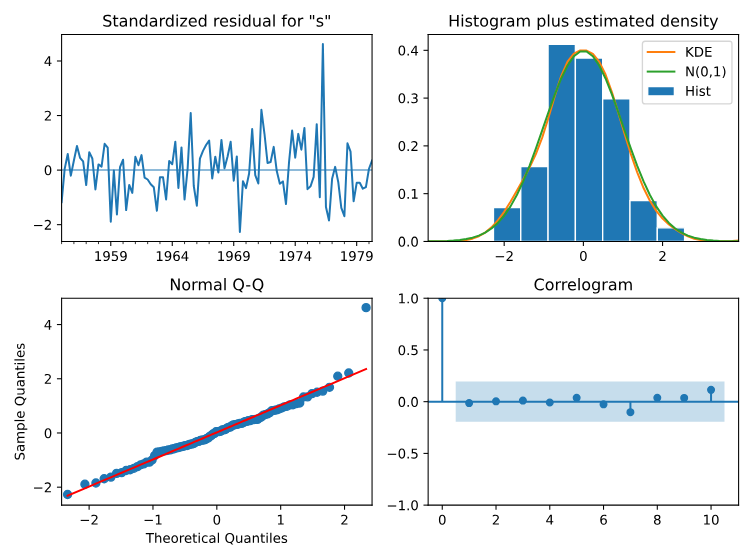

In [ ]:
# Print summary
print(results.summary())

#                                SARIMAX Results                                
# ==============================================================================
# Dep. Variable:                savings   No. Observations:                  102
# Model:                 ARIMA(1, 0, 2)   Log Likelihood                 -98.826
# Date:                Tue, 12 Sep 2023   AIC                            207.653
# Time:                        22:10:40   BIC                            220.778
# Sample:                    01-01-1955   HQIC                           212.968
#                          - 04-01-1980                                         
# Covariance Type:                  opg                                         
# ==============================================================================
#                  coef    std err          z      P>|z|      [0.025      0.975]
# ------------------------------------------------------------------------------
# const          6.1949      0.323     19.169      0.000       5.561       6.828
# ar.L1          0.7284      0.111      6.534      0.000       0.510       0.947
# ma.L1         -0.0538      0.145     -0.370      0.711      -0.338       0.231
# ma.L2          0.3681      0.097      3.814      0.000       0.179       0.557
# sigma2         0.4012      0.043      9.264      0.000       0.316       0.486
# ===================================================================================
# Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                55.12
# Prob(Q):                              0.89   Prob(JB):                         0.00
# Heteroskedasticity (H):               2.61   Skew:                             0.82
# Prob(H) (two-sided):                  0.01   Kurtosis:                         6.20
# ===================================================================================

# Great! The JB p-value is zero, which means you should reject the null hypothesis that the residuals are normally distributed. 
# However, the histogram and Q-Q plots show that the residuals look normal. 
# This time the JB value was thrown off by the one outlying point in the time series. 
# In this case, you could go back and apply some transformation to remove this outlier 
# or you probably just continue to the production stage.

##  Seasonal ARIMA Models

#### Seasonal decompose

You can think of a time series as being composed of trend, seasonal and residual components. This can be a good way to think about the data when you go about modeling it. If you know the period of the time series you can decompose it into these components.

In this exercise you will decompose a time series showing the monthly milk production per cow in the USA. This will give you a clearer picture of the trend and the seasonal cycle. Since the data is monthly you will guess that the seasonality might be 12 time periods, however this won't always be the case.

In [39]:
milk_production = pd.read_csv('milk_production.csv')

milk_production.head()

,date,pounds_per_cow
0,1962-01-01,589.0
1,1962-02-01,561.0
2,1962-03-01,640.0
3,1962-04-01,656.0
4,1962-05-01,727.0


In [40]:
milk_production = milk_production.set_index('date')

milk_production.head()

,pounds_per_cow
date,
1962-01-01,589.0
1962-02-01,561.0
1962-03-01,640.0
1962-04-01,656.0
1962-05-01,727.0


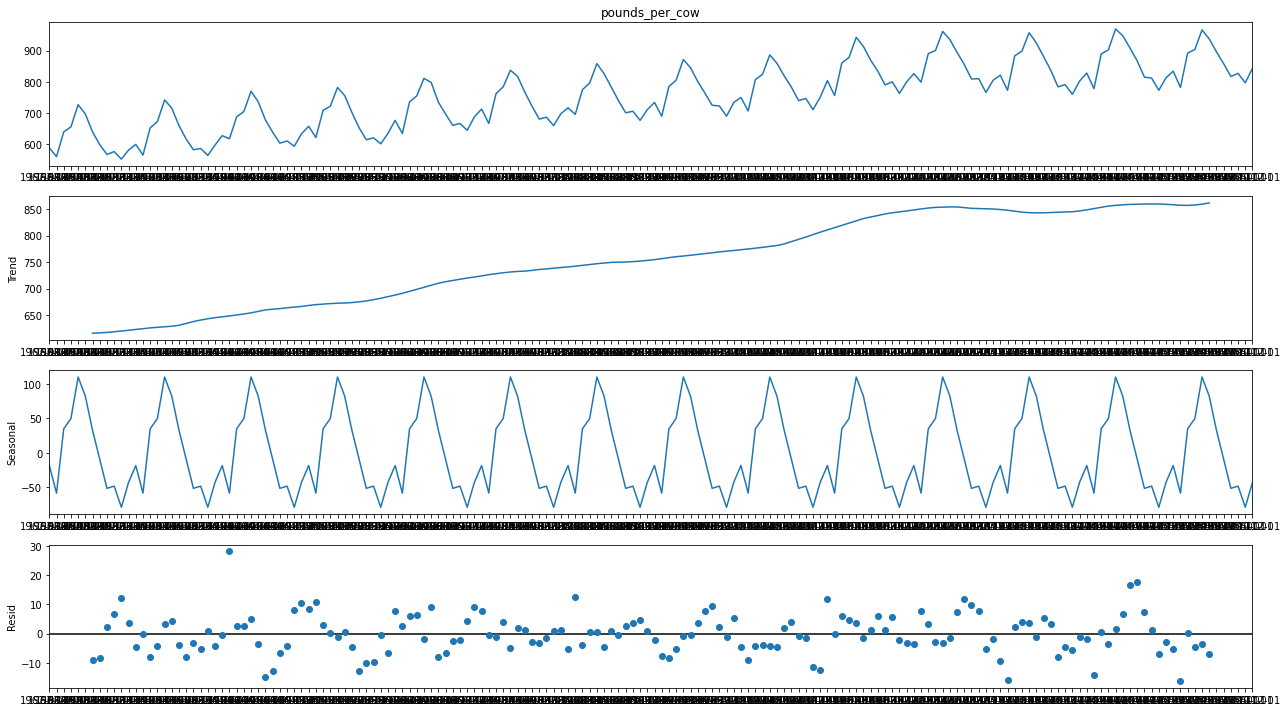

In [41]:
# Perform additive decomposition
decomp = seasonal_decompose(milk_production['pounds_per_cow'], 
                            period=12)

# Plot decomposition
decomp.plot()
plt.show()

#### Seasonal ACF and PACF

Below is a time series showing the estimated number of water consumers in London. By eye you can't see any obvious seasonal pattern, however your eyes aren't the best tools you have.

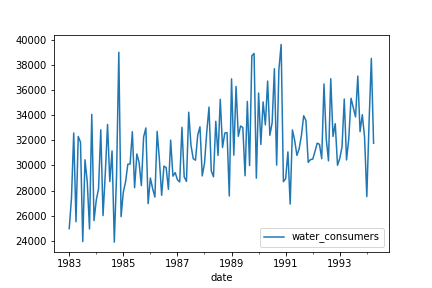 

In this exercise you will use the ACF and PACF to test this data for seasonality. You can see from the plot above that the time series isn't stationary, so you should probably detrend it. You will detrend it by subtracting the moving average. Remember that you could use a window size of any value bigger than the likely period.

In [ ]:
# Create figure and subplot
fig, ax1 = plt.subplots()

# Plot the ACF on ax1
plot_acf(water['water_consumers'], lags = 25, zero=False,  ax=ax1)

# Show figure
plt.show()

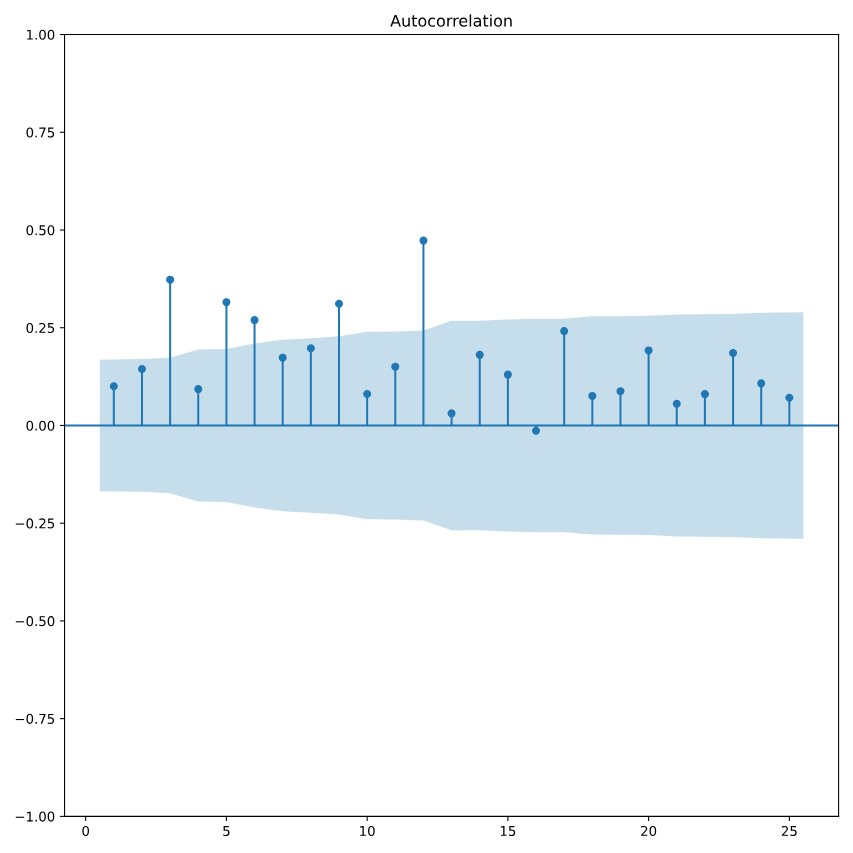

In [ ]:
# Subtract the rolling mean
water_2 = water - water.rolling(15).mean()

# Drop the NaN values
water_2 = water_2.dropna()

# Create figure and subplots
fig, ax1 = plt.subplots()

# Plot the ACF
plot_acf(water_2['water_consumers'], lags=25, zero=False, ax=ax1)

# Show figure
plt.show()

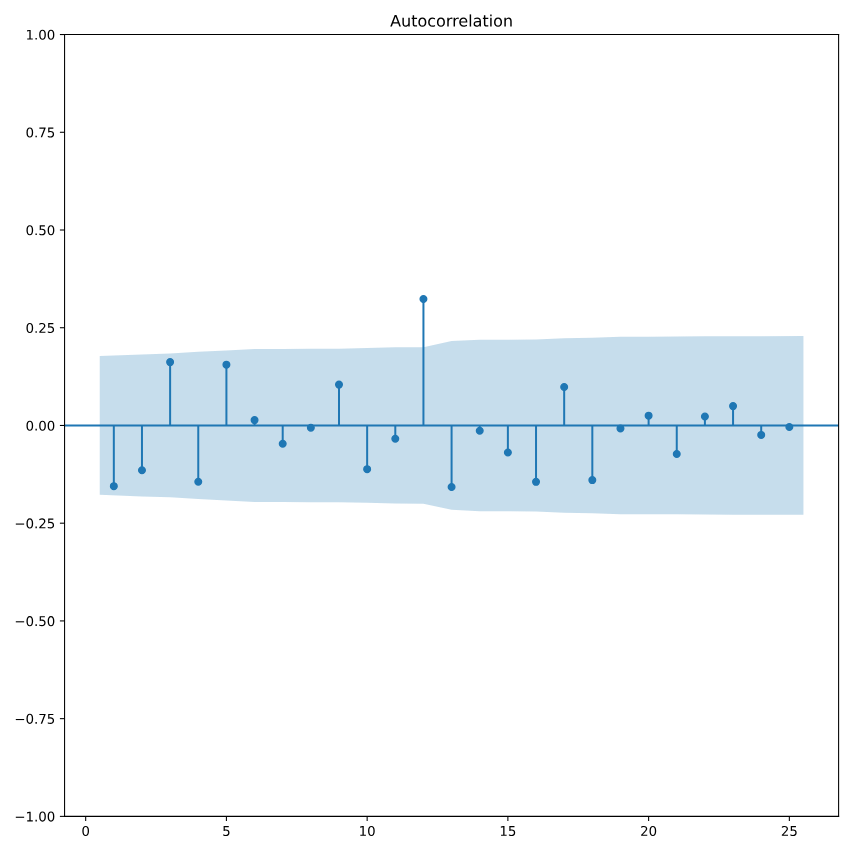

Seasonal component is 12 times steps

In [ ]:
# Create a SARIMA model
model = SARIMAX(df1, order=(1,0,0), seasonal_order=(1,1,0,7))

# Fit the model
results = model.fit()

# Print the results summary
print(results.summary())


#                                     SARIMAX Results                                     
#     =========================================================================================
#     Dep. Variable:                                 Y   No. Observations:                   90
#     Model:             SARIMAX(1, 0, 0)x(1, 1, 0, 7)   Log Likelihood                -556.180
#     Date:                           Tue, 12 Sep 2023   AIC                           1118.361
#     Time:                                   22:34:05   BIC                           1125.617
#     Sample:                               01-01-2013   HQIC                          1121.276
#                                         - 03-31-2013                                         
#     Covariance Type:                             opg                                         
#     ==============================================================================
#                      coef    std err          z      P>|z|      [0.025      0.975]
#     ------------------------------------------------------------------------------
#     ar.L1          0.1039      0.103      1.009      0.313      -0.098       0.306
#     ar.S.L7        0.2753      0.104      2.641      0.008       0.071       0.480
#     sigma2      3.852e+04   7196.907      5.353      0.000    2.44e+04    5.26e+04
#     ===================================================================================
#     Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.68
#     Prob(Q):                              0.97   Prob(JB):                         0.43
#     Heteroskedasticity (H):               1.36   Skew:                            -0.15
#     Prob(H) (two-sided):                  0.42   Kurtosis:                         2.37
#     ===================================================================================
    
#     Warnings:
#     [1] Covariance matrix calculated using the outer product of gradients (complex-step).

In [ ]:
# Create a SARIMA model
model = SARIMAX(df2, order = (2,1,1), seasonal_order = (1,0,0,4))

# Fit the model
results = model.fit()

# Print the results summary
print(results.summary())

#      SARIMAX Results                                      
#     ==========================================================================================
#     Dep. Variable:                                  Y   No. Observations:                   80
#     Model:             SARIMAX(2, 1, 1)x(1, 0, [], 4)   Log Likelihood                -560.340
#     Date:                            Tue, 12 Sep 2023   AIC                           1130.679
#     Time:                                    22:36:06   BIC                           1142.526
#     Sample:                                01-01-2013   HQIC                          1135.426
#                                          - 03-21-2013                                         
#     Covariance Type:                              opg                                         
#     ==============================================================================
#                      coef    std err          z      P>|z|      [0.025      0.975]
#     ------------------------------------------------------------------------------
#     ar.L1          0.2701      0.162      1.672      0.095      -0.047       0.587
#     ar.L2          0.5015      0.110      4.560      0.000       0.286       0.717
#     ma.L1         -0.4271      0.178     -2.401      0.016      -0.776      -0.078
#     ar.S.L4        0.1075      0.127      0.847      0.397      -0.141       0.356
#     sigma2       8.45e+04   1.63e+04      5.178      0.000    5.25e+04    1.16e+05
#     ===================================================================================
#     Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.95
#     Prob(Q):                              1.00   Prob(JB):                         0.62
#     Heteroskedasticity (H):               0.60   Skew:                            -0.07
#     Prob(H) (two-sided):                  0.20   Kurtosis:                         2.48
#     ===================================================================================

In [ ]:
# Create a SARIMA model
model = SARIMAX(df3, order = (1,1,0), seasonal_order = (0,1,1,12))

# Fit the model
results = model.fit()

# Print the results summary
print(results.summary())

#                                           SARIMAX Results                                       
#     ============================================================================================
#     Dep. Variable:                                    Y   No. Observations:                  100
#     Model:             SARIMAX(1, 1, 0)x(0, 1, [1], 12)   Log Likelihood                -521.375
#     Date:                              Tue, 12 Sep 2023   AIC                           1048.750
#     Time:                                      22:37:36   BIC                           1056.148
#     Sample:                                  01-01-2013   HQIC                          1051.729
#                                            - 04-10-2013                                         
#     Covariance Type:                                opg                                         
#     ==============================================================================
#                      coef    std err          z      P>|z|      [0.025      0.975]
#     ------------------------------------------------------------------------------
#     ar.L1          0.4236      0.090      4.720      0.000       0.248       0.600
#     ma.S.L12      -0.0898      0.116     -0.776      0.438      -0.317       0.137
#     sigma2      9347.1461   1407.478      6.641      0.000    6588.541    1.21e+04
#     ===================================================================================
#     Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 0.02
#     Prob(Q):                              0.86   Prob(JB):                         0.99
#     Heteroskedasticity (H):               0.77   Skew:                             0.02
#     Prob(H) (two-sided):                  0.48   Kurtosis:                         3.05
#     ===================================================================================
    

#### Choosing SARIMA order

In this exercise you will find the appropriate model order for a new set of time series. This is monthly series of the number of employed persons in Australia (in thousands). The seasonal period of this time series is 12 months.

You will create non-seasonal and seasonal ACF and PACF plots and use the table below to choose the appropriate model orders.

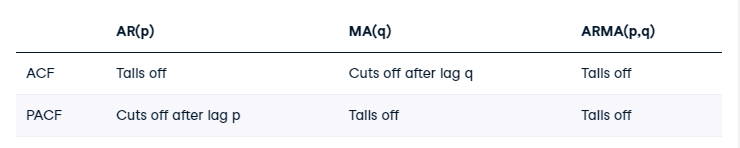

In [ ]:
# Take the first and seasonal differences and drop NaNs
aus_employment_diff = aus_employment.diff().diff(12).dropna()

In [ ]:
# Create the figure 
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(8,6))

# Plot the ACF on ax1
plot_acf(aus_employment_diff, lags = 11, zero = False, ax = ax1)

# Plot the PACF on ax2
plot_pacf(aus_employment_diff, lags = 11, zero = False, ax = ax2)

plt.show()

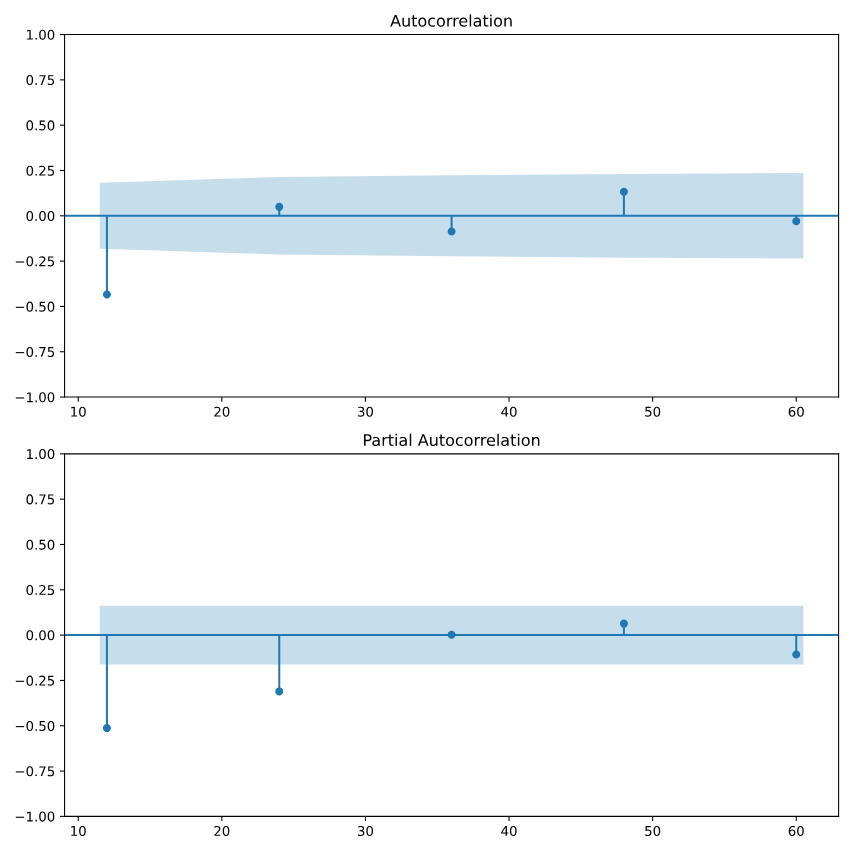

In [ ]:
# Make list of lags
lags = [12, 24, 36, 48, 60]

# Create the figure 
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(8,6))

# Plot the ACF on ax1
plot_acf(aus_employment_diff, lags = lags, zero = False, ax = ax1)

# Plot the PACF on ax2
plot_pacf(aus_employment_diff, lags = lags, zero = False, ax = ax2)

plt.show()

#### SARIMA vs ARIMA forecasts

In this exercise, you will see the effect of using a SARIMA model instead of an ARIMA model on your forecasts of seasonal time series.

Two models, an ARIMA(3,1,2) and a SARIMA(0,1,1)(1,1,1)
, have been fit to the Wisconsin employment time series. These were the best ARIMA model and the best SARIMA model available according to the AIC.

In [ ]:
# Create ARIMA mean forecast
arima_pred = arima_results.get_forecast(steps = 25)
arima_mean = arima_pred.predicted_mean

# Create SARIMA mean forecast
sarima_pred = sarima_results.get_forecast(steps = 25)
sarima_mean = sarima_pred.predicted_mean

# Plot mean ARIMA and SARIMA predictions and observed
plt.plot(dates, sarima_mean, label='SARIMA')
plt.plot(dates, arima_mean, label='ARIMA')
plt.plot(wisconsin_test, label='observed')
plt.legend()
plt.show()

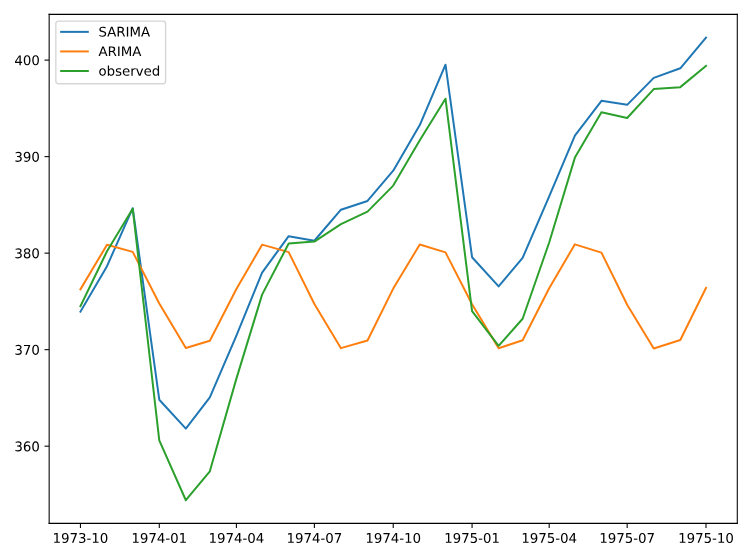

#### Automated model selection

The pmdarima package is a powerful tool to help you choose the model orders. You can use the information you already have from the identification step to narrow down the model orders which you choose by automation.

Remember, although automation is powerful, it can sometimes make mistakes that you wouldn't. It is hard to guess how the input data could be imperfect and affect the test scores.

In this exercise you will use the pmdarima package to automatically choose model orders for some time series datasets.

Be careful when setting the model parameters, if you set them incorrectly your session may time out.

In [ ]:
# Create auto_arima model
model1 = pm.auto_arima(df1,
                      seasonal=True, m=7,
                      d=0, D=1, 
                 	  max_p=2, max_q=2,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True) 

# Print model summary
print(model1.summary())

#     Best model:  ARIMA(0,0,0)(0,1,0)[7]          
#     Total fit time: 1.526 seconds
#                                     SARIMAX Results                                
#     ===============================================================================
#     Dep. Variable:                       y   No. Observations:                   35
#     Model:             SARIMAX(0, 1, 0, 7)   Log Likelihood                 -43.816
#     Date:                 Tue, 12 Sep 2023   AIC                             89.631
#     Time:                         23:04:19   BIC                             90.964
#     Sample:                     01-01-2013   HQIC                            90.039
#                               - 02-04-2013                                         
#     Covariance Type:                   opg                                         
#     ==============================================================================
#                      coef    std err          z      P>|z|      [0.025      0.975]
#     ------------------------------------------------------------------------------
#     sigma2         1.3388      0.454      2.946      0.003       0.448       2.229
#     ===================================================================================
#     Ljung-Box (L1) (Q):                   1.43   Jarque-Bera (JB):                 0.69
#     Prob(Q):                              0.23   Prob(JB):                         0.71
#     Heteroskedasticity (H):               2.86   Skew:                             0.05
#     Prob(H) (two-sided):                  0.13   Kurtosis:                         2.24
#     ===================================================================================

In [ ]:
# Create model
model2 = pm.auto_arima(df2,
                      seasonal=False, 
                      d=1, 
                      trend='c',
                 	  max_p=2, max_q=2,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True) 

# Print model summary
print(model2.summary())

#     SARIMAX Results                                
# ==============================================================================
# Dep. Variable:                      y   No. Observations:                  100
# Model:               SARIMAX(1, 1, 0)   Log Likelihood                -699.435
# Date:                Tue, 12 Sep 2023   AIC                           1404.869
# Time:                        23:04:58   BIC                           1412.655
# Sample:                    01-01-2013   HQIC                          1408.019
#                          - 04-10-2013                                         
# Covariance Type:                  opg                                         
# ==============================================================================
#                  coef    std err          z      P>|z|      [0.025      0.975]
# ------------------------------------------------------------------------------
# intercept     64.0503     31.828      2.012      0.044       1.669     126.432
# ar.L1         -0.3479      0.101     -3.431      0.001      -0.547      -0.149
# sigma2      8.048e+04   1.15e+04      6.983      0.000    5.79e+04    1.03e+05
# ===================================================================================
# Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 4.99
# Prob(Q):                              0.94   Prob(JB):                         0.08
# Heteroskedasticity (H):               1.12   Skew:                            -0.53
# Prob(H) (two-sided):                  0.74   Kurtosis:                         3.28
# ===================================================================================


In [ ]:
# Create model for SARIMAX(p,1,q)(P,1,Q)7
model3 = pm.auto_arima(df3,
                      seasonal=True, m=7,
                      d=1, D=1, 
                      start_p=1, start_q=1,
                      max_p=1, max_q=1,
                      max_P=1, max_Q=1,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True) 

# Print model summary
print(model3.summary())

#                                       SARIMAX Results                                     
#     =========================================================================================
#     Dep. Variable:                                 y   No. Observations:                   60
#     Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 7)   Log Likelihood                -449.338
#     Date:                           Tue, 12 Sep 2023   AIC                            904.675
#     Time:                                   23:05:54   BIC                            910.529
#     Sample:                               01-01-2013   HQIC                           906.920
#                                         - 03-01-2013                                         
#     Covariance Type:                             opg                                         
#     ==============================================================================
#                      coef    std err          z      P>|z|      [0.025      0.975]
#     ------------------------------------------------------------------------------
#     ma.L1         -0.2194      0.148     -1.479      0.139      -0.510       0.071
#     ma.S.L7       -0.7599      0.171     -4.456      0.000      -1.094      -0.426
#     sigma2      1.784e+06   6.68e+05      2.671      0.008    4.75e+05    3.09e+06
#     ===================================================================================
#     Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 4.36
#     Prob(Q):                              0.90   Prob(JB):                         0.11
#     Heteroskedasticity (H):               1.12   Skew:                             0.02
#     Prob(H) (two-sided):                  0.81   Kurtosis:                         1.58
#     ===================================================================================

#### Saving and updating models

Once you have gone through the steps of the Box-Jenkins method and arrived at a model you are happy with, you will want to be able to save that model and also to incorporate new measurements when they are available. This is key part of putting the model into production.

In this exercise you will save a freshly trained model to disk, then reload it to update it with new data.

In [ ]:
# Set model name
filename = 'candy_model.pkl'

# Pickle it
joblib.dump(model,filename)

# Load the model back in
loaded_model = joblib.load(filename)

# Update the model
loaded_model.update(df_new)

#### SARIMA model diagnostics

Usually the next step would be to find the order of differencing and other model orders. However, this time it's already been done for you. The time series is best fit by a SARIMA(1, 1, 1)(0, 1, 1)
 model with an added constant.

In this exercise you will make sure that this is a good model by first fitting it using the SARIMAX class and going through the normal model diagnostics procedure.

In [42]:
co2 = pd.read_csv('co2.csv')

co2.head()

,date,CO2_ppm
0,1958-03-01,315.71
1,1958-04-01,317.45
2,1958-05-01,317.50
3,1958-06-01,317.10
4,1958-07-01,315.86


In [43]:
co2['date'] = pd.to_datetime(co2['date'])

In [44]:
co2 = co2.set_index('date')

co2.head()

,CO2_ppm
date,
1958-03-01,315.71
1958-04-01,317.45
1958-05-01,317.50
1958-06-01,317.10
1958-07-01,315.86


In [45]:
# Create model object
model = SARIMAX(co2, 
                order=((1,1,1) ), 
                seasonal_order=(0,1,1,12), 
)
# Fit model
results = model.fit()

D:\Anaconda\envs\arima\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\Anaconda\envs\arima\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [46]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                            CO2_ppm   No. Observations:                  727
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -183.113
Date:                            Tue, 12 Sep 2023   AIC                            374.226
Time:                                    17:52:27   BIC                            392.510
Sample:                                03-01-1958   HQIC                           381.287
                                     - 09-01-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1959      0.081      2.409      0.016       0.037       0.355
ma.L1         -0.5609      0.070     -7.977      0.000      -0.699      -0.423
ma.S.L12      -0.8678      0.021    -42.207      0.000      -0.908      -0.828
sigma2         0.0955      0.005     20.561      0.000       0.086       0.105
===================================================================================
Ljung-Box (L1) (Q):                   0.15   Jarque-Bera (JB):                 5.18
Prob(Q):                              0.70   Prob(JB):                         0.07
Heteroskedasticity (H):               1.13   Skew:                            -0.00
Prob(H) (two-sided):                  0.34   Kurtosis:                         3.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

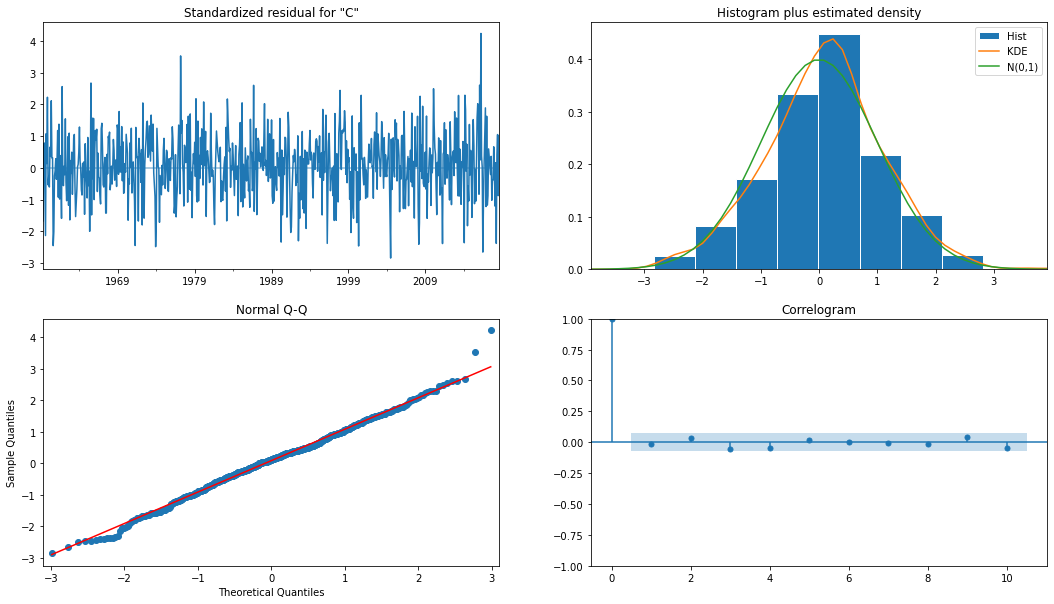

In [47]:
# Plot common diagnostics
results.plot_diagnostics()
plt.show()

#### SARIMA forecast

In the previous exercise you confirmed that a SARIMA 
 x 
 model was a good fit to the CO
 time series by using diagnostic checking.

Now its time to put this model into practice to make future forecasts. Climate scientists tell us that we have until 2030 to drastically reduce our CO
 emissions or we will face major societal challenges.

In this exercise, you will forecast the CO
 time series up to the year 2030 to find the CO
 levels if we continue emitting as usual.

In [48]:
# Create forecast object
forecast_object = results.get_forecast(steps=136)

# Extract predicted mean attribute
mean = forecast_object.predicted_mean

# Calculate the confidence intervals
conf_int = forecast_object.conf_int()

# Extract the forecast dates
dates = mean.index

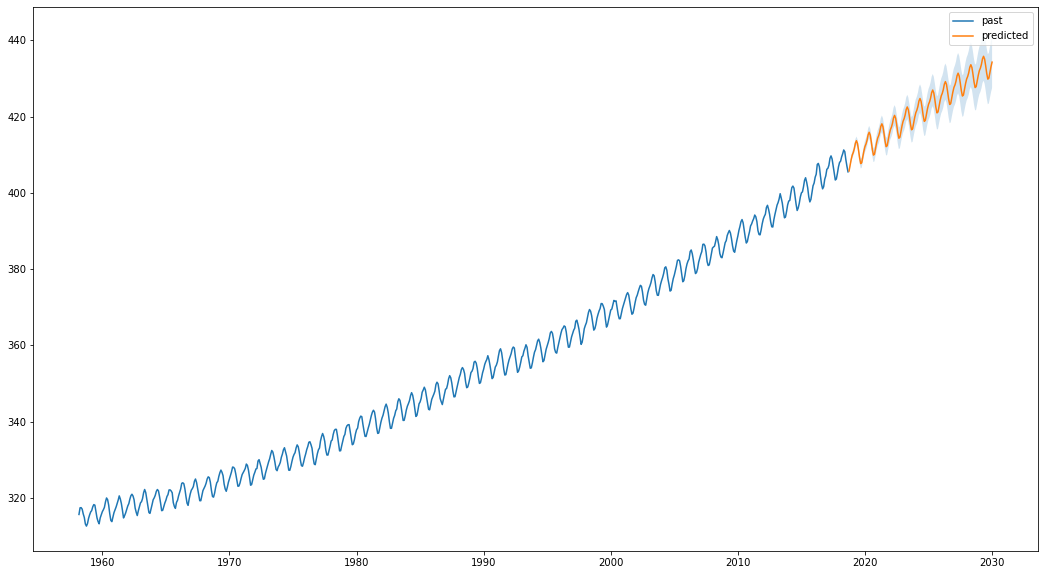

In [49]:
plt.figure()

# Plot past CO2 levels
plt.plot(co2.index, co2, label='past')

# Plot the prediction means as line
plt.plot(dates, mean, label='predicted')

# Shade between the confidence intervals
plt.fill_between(dates, conf_int.iloc[:, 0], conf_int.iloc[:, 1], alpha=0.2)

# Plot legend and show figure
plt.legend()
plt.show()

In [50]:
# Print last predicted mean
print(mean[-1])

# Print last confidence interval
print(conf_int.iloc[-1])

434.26059433303243
lower CO2_ppm    427.484707
upper CO2_ppm    441.036482
Name: 2030-01-01 00:00:00, dtype: float64
